In [19]:
import networkx as nx
import pandas as pd
#import sys
#!{sys.executable} -m pip install colorgram.py
import colorgram
import numpy as np
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt
import re
from base64 import b16encode
import requests
from io import BytesIO
import urllib.request
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
#Created a CSV with some other logos
col_names = ['logo_path','team']
Logos = pd.read_csv('https://raw.githubusercontent.com/PLombardo811/620/Project-1/Logos_csv.csv')

In [21]:
logo_path = Logos.logo_path

team = Logos.team
league = Logos.league

In [22]:
URLs = []
for i in logo_path:
    URL = urllib.request.urlopen(i)
    URLs.append(URL)

In [23]:
colors = []
for i in URLs:
  colors.append(colorgram.extract(i,6))

In [24]:
def GetMyColors(color):
   color_return = []
   for each_color in color[:3]:
       color_string = str(each_color.rgb)
       color_int = (re.findall(r'\d+', color_string))
       color_return.append(color_int)
   return(color_return)

In [25]:
team_colors = {}
for i in list(range(len(team))):
    team_colors[team[i]] = GetMyColors(colors[i])

In [26]:
RGBList = []
for i in colors:
   RGBList.append(GetMyColors(i))

In [27]:
df = pd.DataFrame(list(RGBList),columns=["Color_1", "Color_2", "Color_3"]) 
df.set_value(25, "Color_3", [0,0,0])

,Color_1,Color_2,Color_3
0,"[254, 254, 254]","[232, 0, 51]","[0, 51, 142]"
1,"[254, 254, 254]","[4, 2, 4]","[251, 78, 4]"
2,"[254, 254, 254]","[202, 6, 41]","[252, 254, 252]"
3,"[254, 254, 254]","[29, 29, 29]","[135, 140, 142]"
4,"[255, 255, 255]","[214, 0, 44]","[223, 126, 149]"
5,"[254, 254, 254]","[0, 33, 71]","[224, 228, 233]"
6,"[0, 33, 71]","[254, 254, 254]","[213, 73, 42]"
7,"[254, 254, 254]","[0, 43, 115]","[133, 113, 76]"
8,"[254, 254, 254]","[161, 25, 52]","[0, 32, 67]"
9,"[0, 33, 68]","[255, 255, 255]","[187, 15, 52]"


In [28]:
Color_1  = [list(map(int, x)) for x in df.Color_1]
Color_2  = [list(map(int, x)) for x in df.Color_2]
Color_3  = [list(map(int, x)) for x in df.Color_3]

In [29]:
def Hex():
  Hex_return = []
  for i in Color_1:
      hex = (b'#'+b16encode(bytes(i)))      
      Hex_return.append(hex)
  return(Hex_return)
hex_1 = Hex()
def Hex2():
  Hex_return = []
  for i in Color_2:
      hex = (b'#'+b16encode(bytes(i)))      
      Hex_return.append(hex)
  return(Hex_return)
hex_2 = Hex2()
hex_2
def Hex3():
  Hex_return = []
  for i in Color_3:
      hex = (b'#'+b16encode(bytes(i)))      
      Hex_return.append(hex)
  return(Hex_return)
hex_3 = Hex3()

In [30]:
df['hex_1'] = hex_1
df['hex_2'] = hex_2
df['hex_3'] = hex_3
df['league'] = league
df['team'] = team_colors
df

,Color_1,Color_2,Color_3,hex_1,hex_2,hex_3,league,team
0,"[254, 254, 254]","[232, 0, 51]","[0, 51, 142]",b'#FEFEFE',b'#E80033',b'#00338E',AL,NYY
1,"[254, 254, 254]","[4, 2, 4]","[251, 78, 4]",b'#FEFEFE',b'#040204',b'#FB4E04',AL,BAL
2,"[254, 254, 254]","[202, 6, 41]","[252, 254, 252]",b'#FEFEFE',b'#CA0629',b'#FCFEFC',AL,BOS
3,"[254, 254, 254]","[29, 29, 29]","[135, 140, 142]",b'#FEFEFE',b'#1D1D1D',b'#878C8E',AL,CWS
4,"[255, 255, 255]","[214, 0, 44]","[223, 126, 149]",b'#FFFFFF',b'#D6002C',b'#DF7E95',AL,CLE
5,"[254, 254, 254]","[0, 33, 71]","[224, 228, 233]",b'#FEFEFE',b'#002147',b'#E0E4E9',AL,DET
6,"[0, 33, 71]","[254, 254, 254]","[213, 73, 42]",b'#002147',b'#FEFEFE',b'#D5492A',AL,HOU
7,"[254, 254, 254]","[0, 43, 115]","[133, 113, 76]",b'#FEFEFE',b'#002B73',b'#85714C',AL,KC
8,"[254, 254, 254]","[161, 25, 52]","[0, 32, 67]",b'#FEFEFE',b'#A11934',b'#002043',AL,LAA
9,"[0, 33, 68]","[255, 255, 255]","[187, 15, 52]",b'#002144',b'#FFFFFF',b'#BB0F34',AL,MIN


In [31]:
#G = nx.Graph()
#G.add_edges_from(df["team"].tolist())

In [44]:
df["edges1"] = df.apply(lambda x: (x["team"], x["hex_1"]), axis=1)
df["edges2"] = df.apply(lambda x: (x["team"], x["hex_2"]), axis=1)
df["edges3"] = df.apply(lambda x: (x["team"], x["hex_3"]), axis=1)

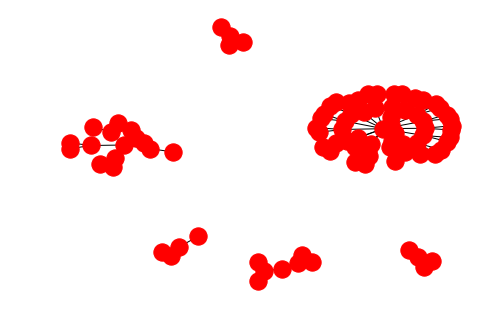

In [45]:
G = nx.Graph()
G.add_edges_from(df["edges1"].tolist() + df["edges2"].tolist() + df["edges3"].tolist())
G.add_nodes_from(df["team"].tolist()+df["hex_1"].tolist() + df["hex_2"].tolist() + df["hex_3"].tolist())
nx.draw(G)

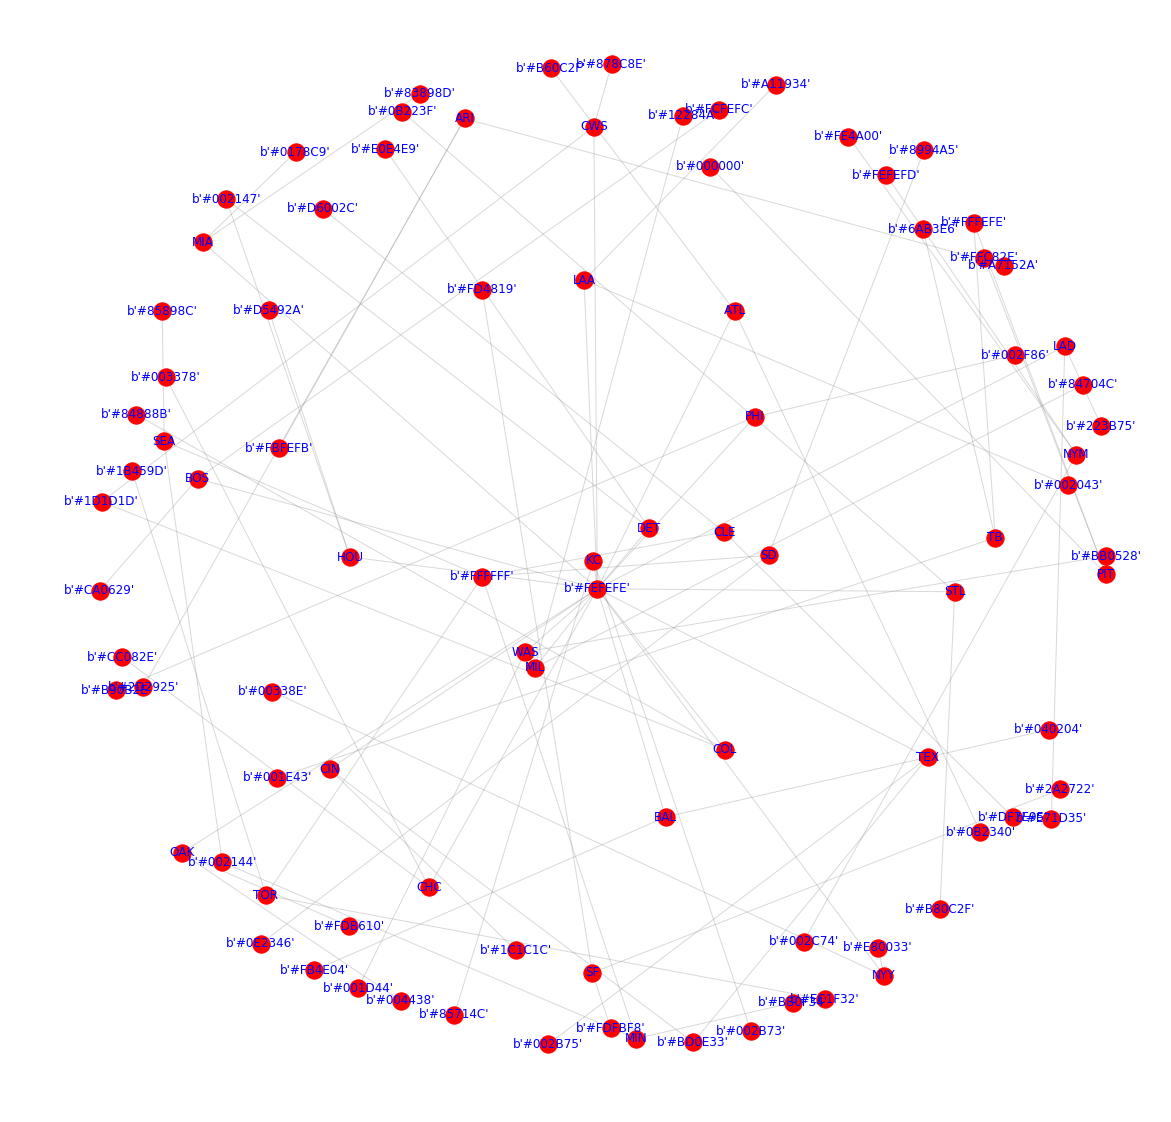

In [46]:
pos = nx.spring_layout(G,k=1.55,iterations=80)
plt.figure(figsize=(20,20))
nx.draw_networkx_labels(G, pos, font_color='Blue')
nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.3)
nx.draw_networkx_nodes(G, pos)
plt.axis('off')
plt.show()